# SiPM parameterization



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import random as rd
import sys

# Add the Utilties directory to the system path so the file sipm_param can be imported.
sys.path.append("../Utilities")
from sipm_param import *

The parameterization is done in two time bins and can be accessed through the function sipm_par(tbin, r) defined in Utilities/sipm_param.py.  Here tbin is the time bin and r is the radial distance from the EL point at which the SiPM of interest is located.

## SiPM response for different time bins

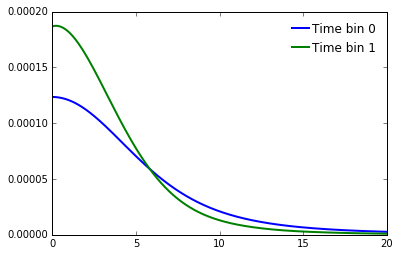

In [3]:
# Plot the SiPM response out to r = 20 (much beyond this the response becomes negative and should not be considered)
rr = np.arange(0, 20, 0.01)

# Time bin 0
p0 = sipm_par(0, rr)
plt.plot(rr, p0, color='blue', lw=2, label='Time bin 0')

# Time bin 1
p1 = sipm_par(1, rr)
plt.plot(rr, p1, color='green', lw=2, label='Time bin 1')

lnd = plt.legend(loc=1,frameon=False,handletextpad=0);

## How to use the parameterization

For photons generated at a point (x,y), an SiPM at a point ($x_i$,$y_i$) will observe a number of photons $n$ (on average) equal to

$n = N_0p_{0}(r) + N_1p_{1}(r)$

where $r = \sqrt{(x-x_i)^2 + (y-y_i)^2}$ and $N_0$ and $N_1$ are the number of photons generated in times that fall in the first and second time bins of the SiPM responses.  Let us assume that:

1. The SiPM response bins are 1 $\mu$s in length
2. Photons are emitted uniformly across the gap over a time of $\Delta t = 2$ $\mu$s.

With these assumptions the number of photons detected according to the response in time bin 0 is equal to that detected according to the response in time bin 2, or $N_{0} = N_{1} = N/2$.  

To avoid statistics of photon detection we assume an "infinite" amount of light is generated at each EL point, $N \rightarrow \infty$.  Therefore we will generate a pattern on a set of SiPMs according to the response curves assuming $N = 1$, refrain from introducing any fluctuations in the number of detected photons, and then normalize the response map to a mean of 0 and standard deviation of 1.

In [4]:
# Geometry definition.
nsipm = 8
sipm_pitch = 10.       # distance between SiPMs
sipm_edge_width = 5.   # distance between SiPM and edge of board

# Variables for computing an EL point location.
xlen = 2*sipm_edge_width + 7*sipm_pitch       # (mm) side length of rectangle
ylen = 2*sipm_edge_width + 7*sipm_pitch       # (mm) side length of rectangle
wbin = 2.0                                    # (mm) bin width

# Compute the positions of the SiPMs.
pos_x = np.ones(nsipm**2)*sipm_edge_width + (np.ones(nsipm*nsipm)*range(nsipm**2) % nsipm)*sipm_pitch
pos_y = np.ones(nsipm**2)*sipm_edge_width + np.floor(np.ones(nsipm*nsipm)*range(nsipm**2) / nsipm)*sipm_pitch

In [19]:
# Generate a random EL point and compute the probabilities of detection for each SiPM.
xpt = rd.random()*xlen
ypt = rd.random()*ylen

rr = np.array([math.sqrt((xi - xpt)**2 + (yi - ypt)**2) for xi,yi in zip(pos_x,pos_y)])
probs = 0.5*(sipm_par(0, rr) + sipm_par(1, rr))

# Shift and normalize the probabilities.
minprob = min(probs); probs += abs(minprob)
maxprob = max(probs); probs /= maxprob

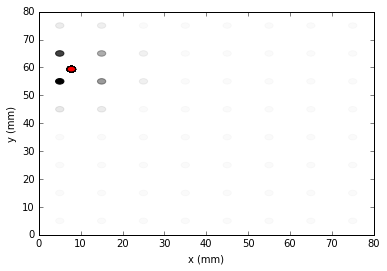

In [21]:
# Set up a plot.
fig = plt.figure();
ax1 = fig.add_subplot(111);
ax1.axis([0, xlen, 0, ylen]);

# Create circles and plot them according to the probabilities.    
for x,y,p in zip(pos_x, pos_y, probs):

    #print "Placing sipm at ({0},{1}) with prob {2}".format(x,y,p);
    
    # Set up the location; note we must invert y due to a pi rotation
    #  about the x-axis.
    r = Ellipse(xy=(x,y), width=2., height=2.);
    r.set_facecolor('0');
    r.set_alpha(0.02 + 0.98*p);
    ax1.add_artist(r);
    mrk = Ellipse(xy=(xpt,ypt), width=2., height=2.);
    mrk.set_facecolor('r');
    ax1.add_artist(mrk);

# Show the plot.
plt.xlabel("x (mm)");
plt.ylabel("y (mm)");